In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
import h5py
from astropy.table import Table
from batman import TransitParams, TransitModel
from astropy.stats import mad_std
from astropy.constants import R_earth, R_sun
from astropy.time import Time
import sys
sys.path.insert(0, '../../TESSellate/')
from toolkit import LightCurve
from astropy.time import Time

from keras.models import load_model

In [51]:
model = load_model('data/model.hdf5')

In [52]:
koi_table = Table.read('../data/cumulative_2019.07.05_01.52.59.votable')
koi_table.add_index('kepid')

In [53]:
from astropy.stats import sigma_clip

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in true_divide
/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide


skipped b'Kepler-261 b'
skipped b'Kepler-156 c'
skipped b''
skipped b'Kepler-479 b'
skipped b''
skipped b'Kepler-19 b'
skipped b'Kepler-260 b'
skipped b'Kepler-489 b'
skipped b'Kepler-149 b'
skipped b''
skipped b'Kepler-198 b'
skipped b'Kepler-146 b'
skipped b'Kepler-543 b'
skipped b'Kepler-473 b'
skipped b'Kepler-416 b'
skipped b'Kepler-472 b'
skipped b'Kepler-319 c'
skipped b'Kepler-1656 b'
skipped b'Kepler-103 c'
skipped b'Kepler-475 b'
skipped b'Kepler-130 c'
skipped b''
skipped b'Kepler-307 b'
skipped b'Kepler-96 b'
skipped b'Kepler-88 b'
skipped b'Kepler-169 f'
skipped b'Kepler-48 c'
skipped b''
skipped b'Kepler-636 b'
skipped b'Kepler-517 b'
skipped b'Kepler-202 c'
skipped b'Kepler-518 b'
skipped b'Kepler-203 b'
skipped b'Kepler-519 b'
skipped b'Kepler-1627 b'
skipped b'Kepler-205 c'
skipped b'Kepler-539 b'
skipped b'Kepler-11 e'
skipped b'Kepler-196 c'
skipped b'Kepler-314 c'
skipped b'Kepler-104 d'
skipped b'Kepler-1313 b'
skipped b'Kepler-491 b'
skipped b'Kepler-20 c'
skipped

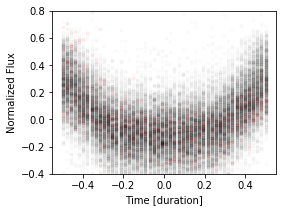

skipped b'Kepler-209 c'
skipped b''
skipped b'Kepler-643 b'
skipped b'Kepler-289 c'
skipped b'Kepler-137 c'
skipped b'Kepler-161 b'
skipped b'Kepler-138 c'
skipped b'Kepler-112 c'
skipped b''
skipped b''
skipped b''
skipped b'Kepler-139 c'
skipped b'Kepler-474 b'
skipped b'Kepler-500 b'
skipped b'Kepler-476 b'
skipped b''
skipped b'Kepler-95 b'
skipped b'Kepler-77 b'
skipped b'Kepler-106 e'
skipped b''
skipped b'Kepler-37 d'
skipped b''


../../TESSellate/toolkit/lightcurve.py:603: RankWarning: Polyfit may be poorly conditioned
  self.fluxes[mask][~near_transit], order)


skipped b''
skipped b'Kepler-111 c'
skipped b'Kepler-18 d'
skipped b''
skipped b'Kepler-540 b'
skipped b'Kepler-69 b'
skipped b'Kepler-463 b'
skipped b'Kepler-648 b'
skipped b'Kepler-650 b'
skipped b'Kepler-215 d'
skipped b'Kepler-115 c'
skipped b'Kepler-62 d'
skipped b'Kepler-523 b'
skipped b'Kepler-192 b'
skipped b'Kepler-33 d'
skipped b'Kepler-108 b'
skipped b'Kepler-461 b'
skipped b'Kepler-478 b'
skipped b'Kepler-484 b'
skipped b'Kepler-105 b'
skipped b'Kepler-218 c'
skipped b'Kepler-422 b'
skipped b''
skipped b'Kepler-652 b'
skipped b'Kepler-219 c'
skipped b'Kepler-318 b'
skipped b'Kepler-220 c'
skipped b'Kepler-221 c'
skipped b''
skipped b'Kepler-102 e'
skipped b'Kepler-94 b'
skipped b''
skipped b'Kepler-22 b'
010619192 b'Kepler-17 b'


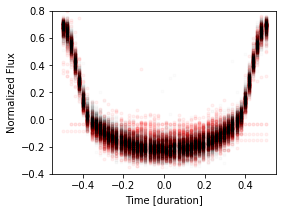

010748390 b'Kepler-3 b'


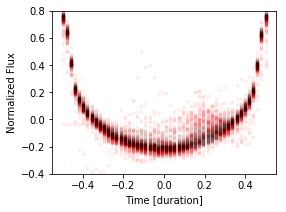

skipped b'Kepler-482 b'
skipped b'Kepler-432 b'
skipped b'Kepler-6 b'
skipped b'Kepler-414 c'
skipped b'Kepler-101 b'
skipped b'Kepler-1651 b'
skipped b'Kepler-114 d'
skipped b'Kepler-142 c'
skipped b'Kepler-466 b'
skipped b'Kepler-530 b'
skipped b'Kepler-531 b'
skipped b'Kepler-532 b'
skipped b'Kepler-533 b'
skipped b'Kepler-464 b'
skipped b'Kepler-396 c'
skipped b'Kepler-124 c'
skipped b'Kepler-956 b'
skipped b'Kepler-15 b'
skipped b'Kepler-1 b'
skipped b'Kepler-468 b'
011502218 b''


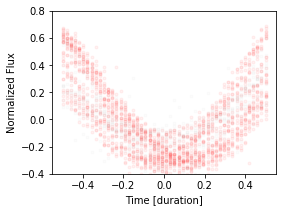

skipped b'Kepler-411 c'
011554435 b'Kepler-63 b'


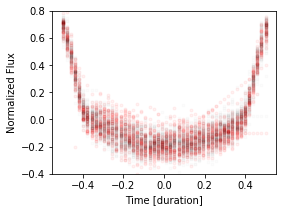

skipped b'Kepler-534 b'
skipped b''
skipped b'Kepler-324 c'
skipped b'Kepler-538 b'
skipped b'Kepler-536 b'
skipped b'Kepler-12 b'
skipped b'Kepler-4 b'
skipped b'Kepler-10 c'
skipped b'Kepler-470 b'
skipped b''
skipped b'Kepler-113 c'
skipped b''
skipped b'Kepler-858 b'


In [73]:
archive = h5py.File('../data/kepler_lcs/archive.hdf5', 'r')

interp_times = np.linspace(-0.5, 0.5, 50)

kepids = []
scatter_ratio = []
oot_scatter = []
for kepid in list(archive): 
    if kepid != '001026895' and kepid != '004165496' and kepid != '010676011':  # bad file
        bstr = str(int(kepid)).encode()
        props = koi_table.loc[bstr]

        # Exclude systems with TTVs
        if kepid not in ['001161345', '003323887', '011401755', '004349452', '007447200']:  
        
            if not isinstance(koi_table.loc[bstr]['kepid'], bytes): 
                props = props[np.argmax(props['koi_depth'])]

            period = props['koi_period']
            duration = props['koi_duration'] / 24

            epoch = props['koi_time0bk'] + 2454833 #+ 0.5*duration
            b = props['koi_impact']

            params = TransitParams()
            params.per = period
            params.t0 = epoch
            params.duration = duration
            params.rp = float(props['koi_prad']*R_earth/(props['koi_srad']*R_sun)) #(props['koi_depth'] * 1e-6)**0.5


            a = (np.sin(duration * np.pi / period) / np.sqrt((1 + params.rp)**2 - b**2))**-1

            params.a = a
            params.inc = np.degrees(np.arccos(b / params.a))
            params.w = 90
            params.ecc = 0
            params.limb_dark = 'quadratic'
            params.u = [0.5079, 0.2239]

            t, f = archive[kepid][:]
            sort = np.argsort(t)

            t = Time(t[sort], format='jd')
            f = f[sort]

            lc = LightCurve(t, f)
            packed = lc.mask_out_of_transit(params, oot_duration_fraction=1.5)

            if len(packed['times']) > 0:
                transits = LightCurve(**packed).get_transit_light_curves(params)

                if len(transits) > 0:   
                    resampled_transits = []
                    for i, transit in enumerate(transits): 
                        transit.remove_polynomial_baseline(params, order=2)
                        n_fluxes = len(transit.fluxes)

                        # Skip partial transits
                        if (i > 3 and transit.fluxes.shape[0] >= 0.9*np.median([len(j) for j in resampled_transits])) or i <= 3: 

                                #tr = transit.fluxes[midind-150:midind+150]#[np.newaxis, :, np.newaxis]

            #                             tr = np.interp(np.linspace(transit.times.jd.min(), transit.times.jd.max(), 300), 
            #                                            transit.times.jd, transit.fluxes)#[np.newaxis, :, np.newaxis]
                                midtransittime = round((transit.times.jd.mean() - params.t0) / params.per)

                                interped_lc = np.interp(interp_times, 
                                                        (transit.times.jd - (params.t0 + midtransittime*params.per)) / duration, 
                                                        transit.fluxes)
                                interped_lc -= np.nanmean(interped_lc)
                                interped_lc /= (np.nanmax(interped_lc) - np.nanmin(interped_lc))

            #                         interped_lc /= interped_lc.ptp()
                                resampled_transits.append(interped_lc)

                    resampled_transits = np.vstack(resampled_transits)[:, :, np.newaxis]

                    pred_y = model.predict(resampled_transits, batch_size = 128)
                    
                    # (nor really but sort of) assignment probability spotted >99%
                    bools = pred_y[:, 1] > 0.99 #np.argmax(pred_y, axis=1).astype(bool)
                    kepids.append(kepid)
                    # If there are at least 10 flagged transits, flag the object: 
                    if np.count_nonzero(bools) > 10: 
                        print(kepid, props['kepler_name'])
#                         print(bools)
                        plt.figure(figsize=(4,3))
                        plt.plot(np.linspace(-0.5, 0.5, 50), resampled_transits[bools, :, 0].T, 'r.', alpha=0.05, rasterized=True)
                        plt.plot(np.linspace(-0.5, 0.5, 50), resampled_transits[np.logical_not(bools), :, 0].T, '.k', alpha=0.01, rasterized=True)
                        plt.xlabel('Time [duration]')
                        plt.ylabel('Normalized Flux')
                        plt.ylim([-0.4, 0.8])
                        plt.savefig('plots/{0}.pdf'.format(kepid), bbox_inches='tight')
                        plt.show()
                        if kepid == '007051180': 
                            np.save('data/007051180.npy', bools)
                    else: 
                        print('skipped', props['kepler_name'])

In [61]:
len(kepids)

139